In [1]:
%load_ext cythonmagic
%matplotlib inline 
import numpy as np #mathematical computation
import pandas as pd #dataframe and data structure
import matplotlib.pyplot as plt #plot and graph
from matplotlib import style #customized plot design
import matplotlib.ticker as mticks #customize tick and ticklables
import matplotlib.dates as mdates #format dates

import pyximport; pyximport.install()
import aop #cython code pxy file

from Stock import Stock #Stock class

C:\Users\Amrin.Kishwary\Anaconda3\lib\site-packages\IPython\extensions\cythonmagic.py:21: UserWarning: The Cython magic has been moved to the Cython package
  warnings.warn("""The Cython magic has been moved to the Cython package""")


In [2]:
#import transaction data from excel sheet
transaction = pd.read_excel('Transaction Example.xlsx', sheet_name = 'Transactions')
df = pd.DataFrame(transaction)
df.set_index("Date",inplace=True)
#import price data from excel sheet
price = pd.read_excel('Transaction Example.xlsx', sheet_name = 'Prices')
df1 = pd.DataFrame(price)
df1.set_index("Date",inplace=True)

In [3]:
#sort data for AAPl
df2 = df[(df["Ticker"]=="AAPL")]
df2.drop(["Ticker"],axis=1)
df1 = df1[["AAPL"]]
df1.columns=["Mkt_Price"]

In [4]:
#create stock object for aapl
aapl = Stock("AAPL",df2,df1)

In [5]:
#get ticker
print(aapl.get_ticker())

AAPL


In [6]:
#get transactions
df = aapl.get_transactions()
print(df.head(5))

           Ticker  Quantity      Price
Date                                  
2007-01-12   AAPL     -6500  12.028458
2007-01-23   AAPL    -12000  11.049555
2007-02-05   AAPL     21000  10.756955
2007-02-14   AAPL     23900  10.783425
2007-02-21   AAPL    -11000  11.492986


In [7]:
#get mkt_price
df = aapl.get_mkt_price()
print(df.head(5))

            Mkt_Price
Date                 
2007-01-03  10.769468
2007-01-04  11.008504
2007-01-05  10.930110
2007-01-08  10.984086
2007-01-09  11.896535


In [8]:
#get date
df = aapl.get_date()
print(df)

['2007-01-03T00:00:00.000000000' '2007-01-04T00:00:00.000000000'
 '2007-01-05T00:00:00.000000000' ... '2018-02-26T00:00:00.000000000'
 '2018-02-27T00:00:00.000000000' '2018-02-28T00:00:00.000000000']


In [9]:
#get start date
start = aapl.get_start_date()
temp = str(start)
print(temp[0:10])
#start date is based on mkt_price not transaction

2007-01-03


In [10]:
#get end date 
end = aapl.get_end_date()
temp = str(end)
print(temp[0:10])
#end date is based on mkt_price not transaction

2018-02-28


In [11]:
#get cost in dollars
df = aapl.get_cost()
print(df.head(5))

Date
2007-01-12    -78184.978570
2007-01-23   -132594.664880
2007-02-05    225896.059763
2007-02-14    257723.851795
2007-02-21   -126422.846332
Name: Cost, dtype: float64


In [12]:
#get pnl 
df = aapl.get_pnl()
#copy to excel
aapl.copy_to_excel("testing_appl.xlsx","aapl")

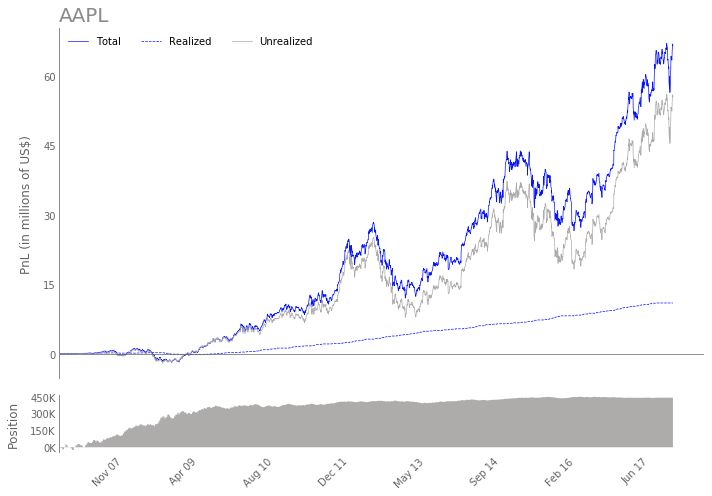

In [13]:
aapl.plot_stock()